## Init

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cart
import cartopy.io.img_tiles as cimgt
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import scipy.stats as stats
import calendar

## Ice Concentration

### Loading data

In [3]:
file_path = r"C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\icec.mon.mean.nc"
ds_icec = xr.open_dataset(file_path)
ds_icec = ds_icec.sel(time=slice('1950', None))
ds_icec

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    icec     (time, lat, lon) float32 218MB ...
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html

In [4]:
# Calculate Ice concentration anomaly
icec_climo = ds_icec.groupby('time.month').mean(dim='time')
icec_anomaly = ds_icec.groupby('time.month') - icec_climo
icec_anomaly

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec     (time, lat, lon) float32 218MB 0.005286 0.005571 0.005 ... nan nan

In [5]:
print(icec_anomaly)  # Check the structure and dimensions

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec     (time, lat, lon) float32 218MB 0.005286 0.005571 0.005 ... nan nan


In [7]:
print(icec_anomaly['time'])

<xarray.DataArray 'time' (time: 840)> Size: 7kB
array(['1950-01-01T00:00:00.000000000', '1950-02-01T00:00:00.000000000',
       '1950-03-01T00:00:00.000000000', ..., '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    prev_avg_period:     0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    actual_range:        [-14975.  47085.]


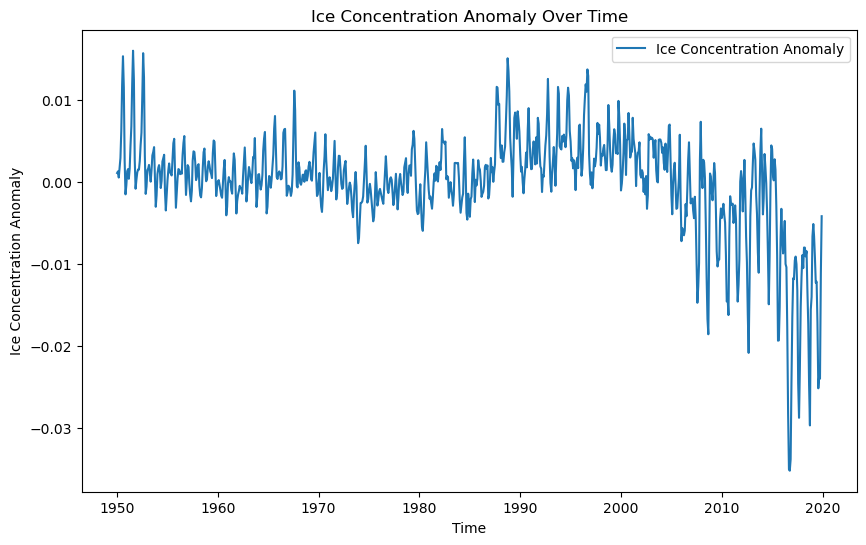

In [8]:
# Plot the ice concentration anomaly over time
plt.figure(figsize=(10, 6))
plt.plot(icec_anomaly['time'], icec_anomaly['icec'].mean(dim=['lat', 'lon']), label='Ice Concentration Anomaly')
plt.xlabel('Time')
plt.ylabel('Ice Concentration Anomaly')
plt.title('Ice Concentration Anomaly Over Time')
plt.legend()
plt.show()

## How many months do we have with ICE Concentration Anomalies

In [13]:
# Define the coordinates for the North Slope of Alaska
lat_north_slope = 70.0
lon_north_slope = -150.0

# Select the nearest point in the dataset
point_data = ds_icec.sel(lat=lat_north_slope, lon=lon_north_slope, method='nearest')

# Display the data for the selected point
print(point_data)

<xarray.Dataset> Size: 10kB
Dimensions:  (time: 840)
Coordinates:
    lat      float32 4B 70.5
    lon      float32 4B 0.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    icec     (time) float32 3kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html


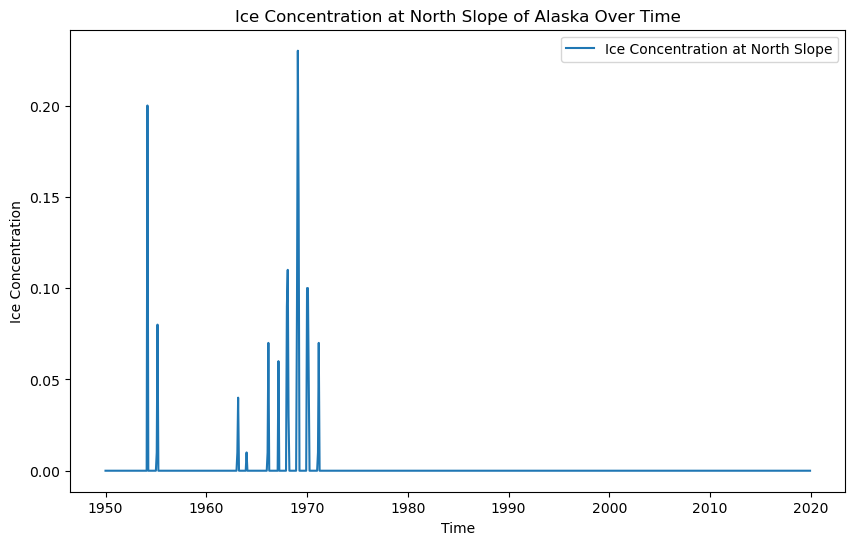

In [15]:
# Plot the ice concentration at the North Slope of Alaska over time
plt.figure(figsize=(10, 6))
plt.plot(point_data['time'], point_data['icec'], label='Ice Concentration at North Slope')
plt.xlabel('Time')
plt.ylabel('Ice Concentration')
plt.title('Ice Concentration at North Slope of Alaska Over Time')
plt.legend()
plt.show()

positive_anomaly:  <bound method Mapping.values of <xarray.Dataset> Size: 521kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    icec     (lat, lon) int64 518kB 244 244 244 244 244 244 244 ... 0 0 0 0 0 0>
negative_anomaly:  <bound method Mapping.values of <xarray.Dataset> Size: 521kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    icec     (lat, lon) int64 518kB 80 80 84 81 80 81 80 80 ... 0 0 0 0 0 0 0 0>
neutral_anomaly:  <bound method Mapping.values of <xarray.Dataset> Size: 521kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1

ValueError: x and y can be no greater than 2D, but have shapes (840,) and (840, 180, 360)

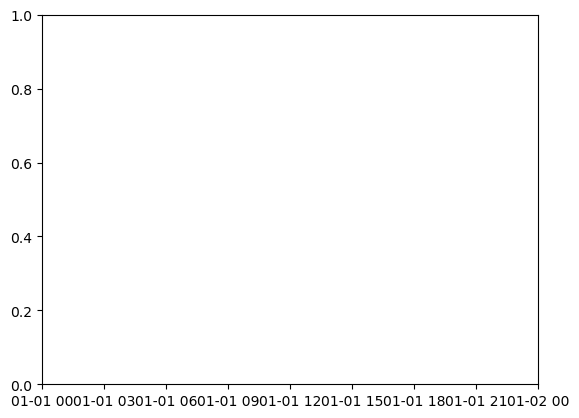

In [41]:
positive_anomaly = icec_anomaly.where(icec_anomaly >= 0.01)
negative_anomaly = icec_anomaly.where(icec_anomaly <= -0.01)
neutral_anomaly = icec_anomaly.where(np.logical_and(icec_anomaly < 0.01, 
                                                    icec_anomaly > -0.01))

print('positive_anomaly: ', positive_anomaly.count(dim='time').values) # Check the number of positive anomalies
print('negative_anomaly: ', negative_anomaly.count(dim='time').values) # Check the number of negative anomalies
print('neutral_anomaly: ', neutral_anomaly.count(dim='time').values) # Check the number of neutral anomalies

counts = [positive_anomaly.count(dim='time').values, 
          negative_anomaly.count(dim='time').values, 
          neutral_anomaly.count(dim='time').values]
print(counts)

# Plot the number of positive, negative, and neutral anomalies
plt.plot(ds_icec['time'], ds_icec ['icec'], 'k')
plt.fill_between(ds_icec['time'], 0, ds_icec['icec'], where=positive_anomaly['icec'].notnull(), color='red', label='Positive Anomaly')  # Positive anomaly
plt.fill_between(ds_icec['time'], 0, ds_icec['icec'], where=negative_anomaly['icec'].notnull(), color='blue', label='Negative Anomaly')  # Negative anomaly 
plt.fill_between(ds_icec['time'], 0, ds_icec['icec'], where=neutral_anomaly['icec'].notnull(), color='green', label='Neutral Anomaly')  # Neutral anomaly   
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at 0
plt.axhline(0.15, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0.15
plt.axhline(-0.15, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at -0.15

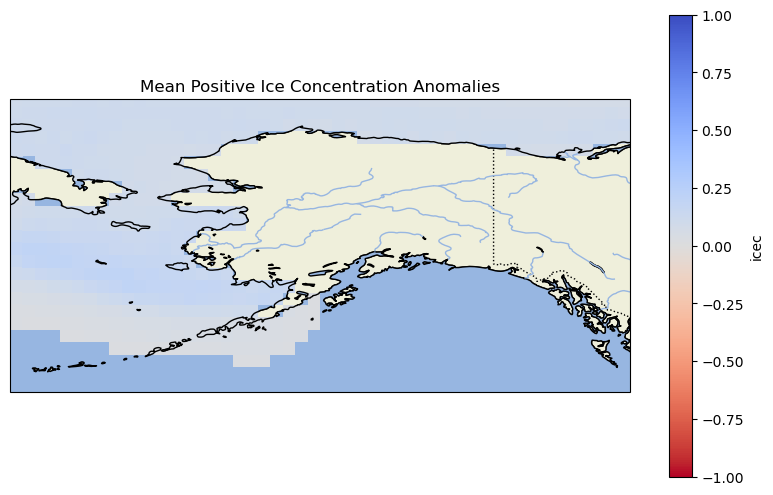

In [43]:
# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Plot the positive ice concentration anomalies
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_feature(cart.BORDERS, linestyle=':')
ax.add_feature(cart.COASTLINE)
ax.add_feature(cart.LAND, edgecolor='black')
ax.add_feature(cart.OCEAN)
ax.add_feature(cart.LAKES, edgecolor='black')
ax.add_feature(cart.RIVERS)

# Plot the data
positive_anomaly['icec'].mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', vmin=-1, vmax=1, add_colorbar=True)

# Add title
ax.set_title('Mean Positive Ice Concentration Anomalies')

plt.show()

How many months do we have with Ice concentration

In [18]:
positive_anomaly_count = positive_anomaly['icec'].count(dim='time')
print('Number of months with positive anomaly:', positive_anomaly_count.values)

Number of months with positive anomaly: [[244 244 244 ... 244 244 244]
 [244 305 244 ... 244 244 244]
 [259 260 271 ... 261 209 282]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [19]:
print('Positive: ', positive_anomaly.count(dim='time').values)
print('Neutral: ', neutral_anomaly.count(dim='time').values)
print('Negative: ', negative_anomaly.count(dim='time').values)

counts=[positive_anomaly.count(dim='time').values,
        negative_anomaly.count(dim='time').values,
        neutral_anomaly.count(dim='time').values]
print(counts)

Positive:  <bound method Mapping.values of <xarray.Dataset> Size: 521kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    icec     (lat, lon) int64 518kB 244 244 244 244 244 244 244 ... 0 0 0 0 0 0>
Neutral:  <bound method Mapping.values of <xarray.Dataset> Size: 521kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    icec     (lat, lon) int64 518kB 516 516 512 515 516 515 516 ... 0 0 0 0 0 0>
Negative:  <bound method Mapping.values of <xarray.Dataset> Size: 521kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 .

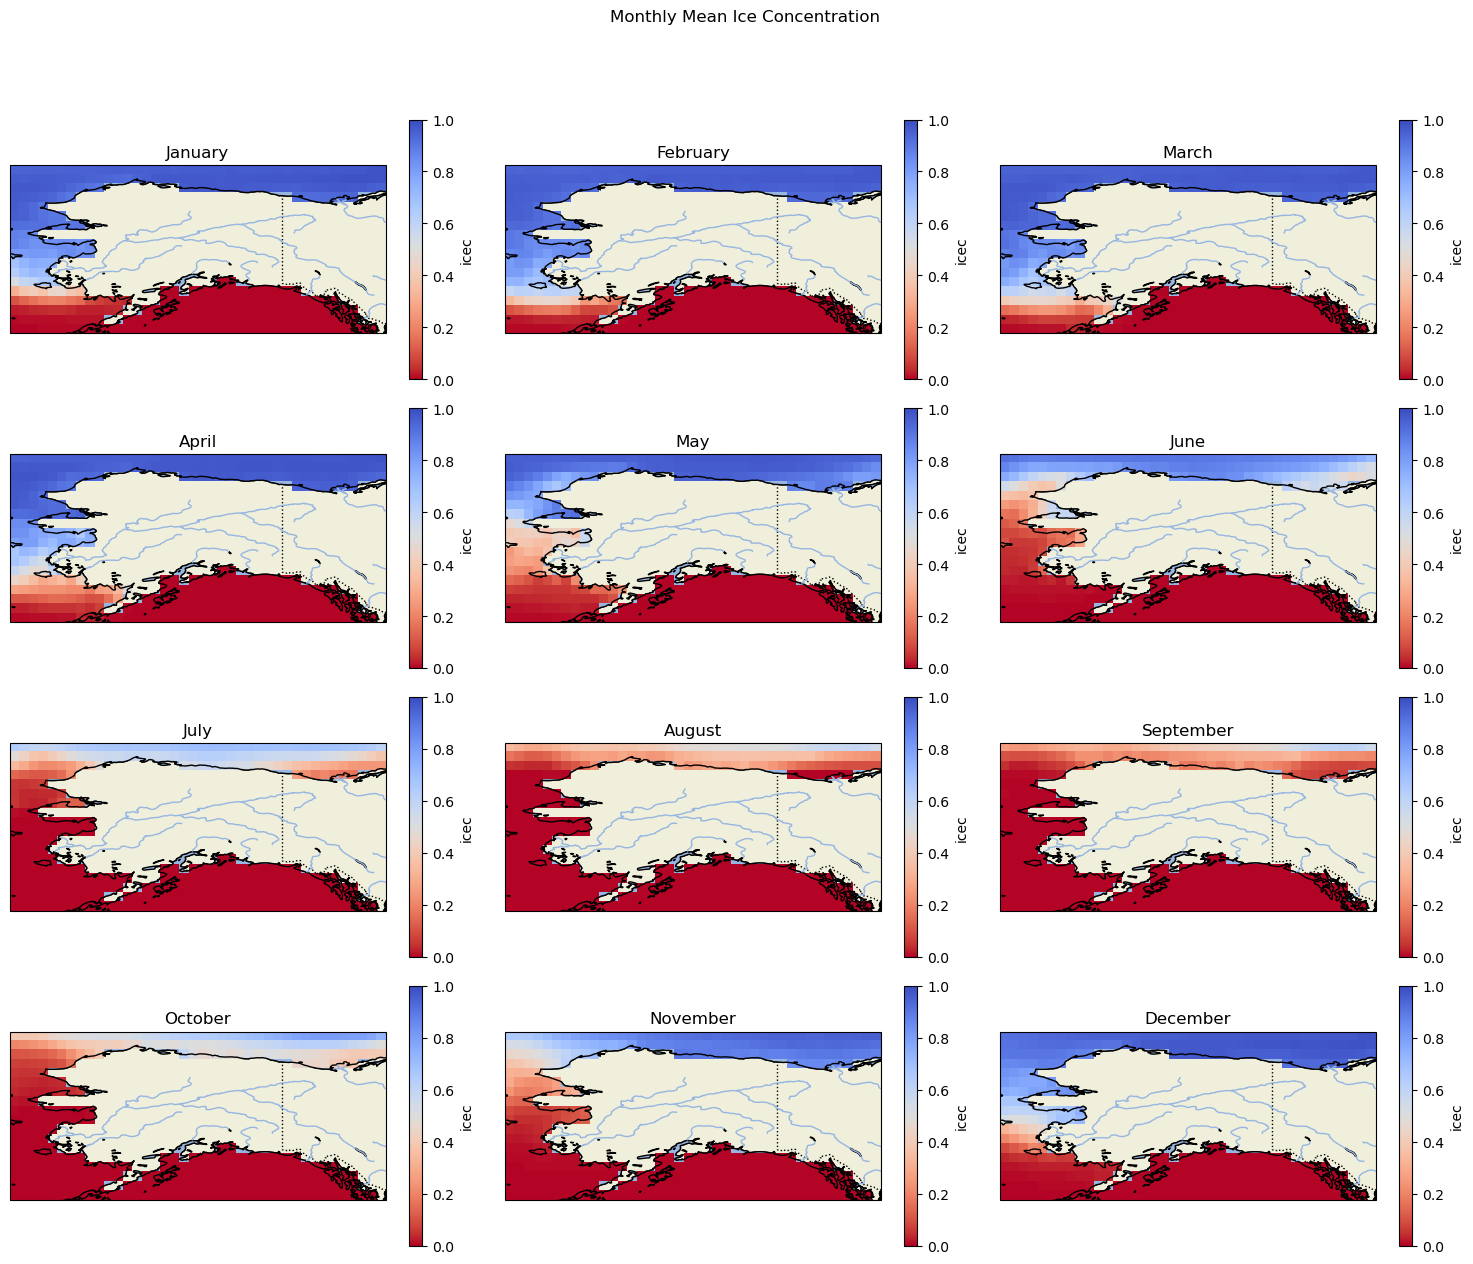

In [27]:
# Define the extent for Alaska

extent = [-170, -130, 55, 72]

# Plot the mean ice concentration for each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    ds_icec['icec'].sel(time=ds_icec['time.month']==i+1).mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', vmin=0, vmax=1)
    ax.set_title(calendar.month_name[i+1])

# Add colorbar at the bottom
# cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.02])
# cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='coolwarm'), cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Ice Concentration')
fig.suptitle('Monthly Mean Ice Concentration', y=1.05)
plt.tight_layout()
plt.show()

C:\Users\rbendopa\AppData\Local\Temp\ipykernel_22048\189468442.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


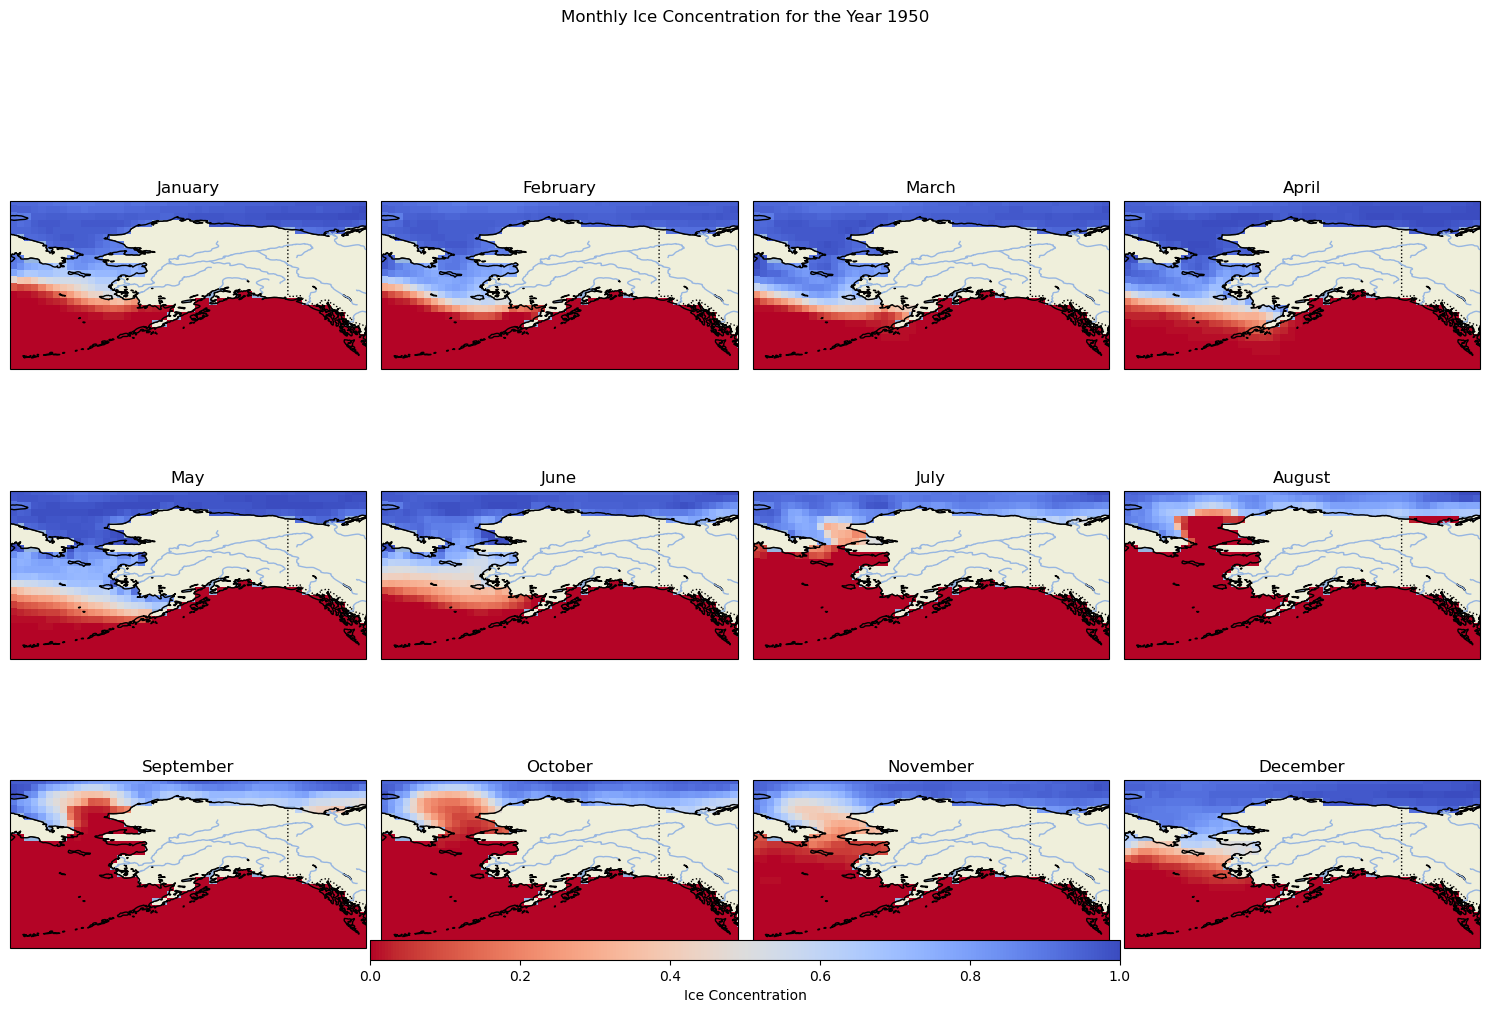

In [23]:
# Select data for the year 1950
icec_1950 = ds_icec['icec'].sel(time=slice('1950-01-01', '1950-12-31'))

# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Plot the ice concentration for each month of the year 1950
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    icec_1950.isel(time=i).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)
    ax.set_title(calendar.month_name[i+1])

# Add colorbar
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.02])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='coolwarm_r'), cax=cbar_ax, orientation='horizontal')
cbar.set_label('Ice Concentration')
fig.suptitle('Monthly Ice Concentration for the Year 1950', y=1.05)
plt.tight_layout()
plt.show()

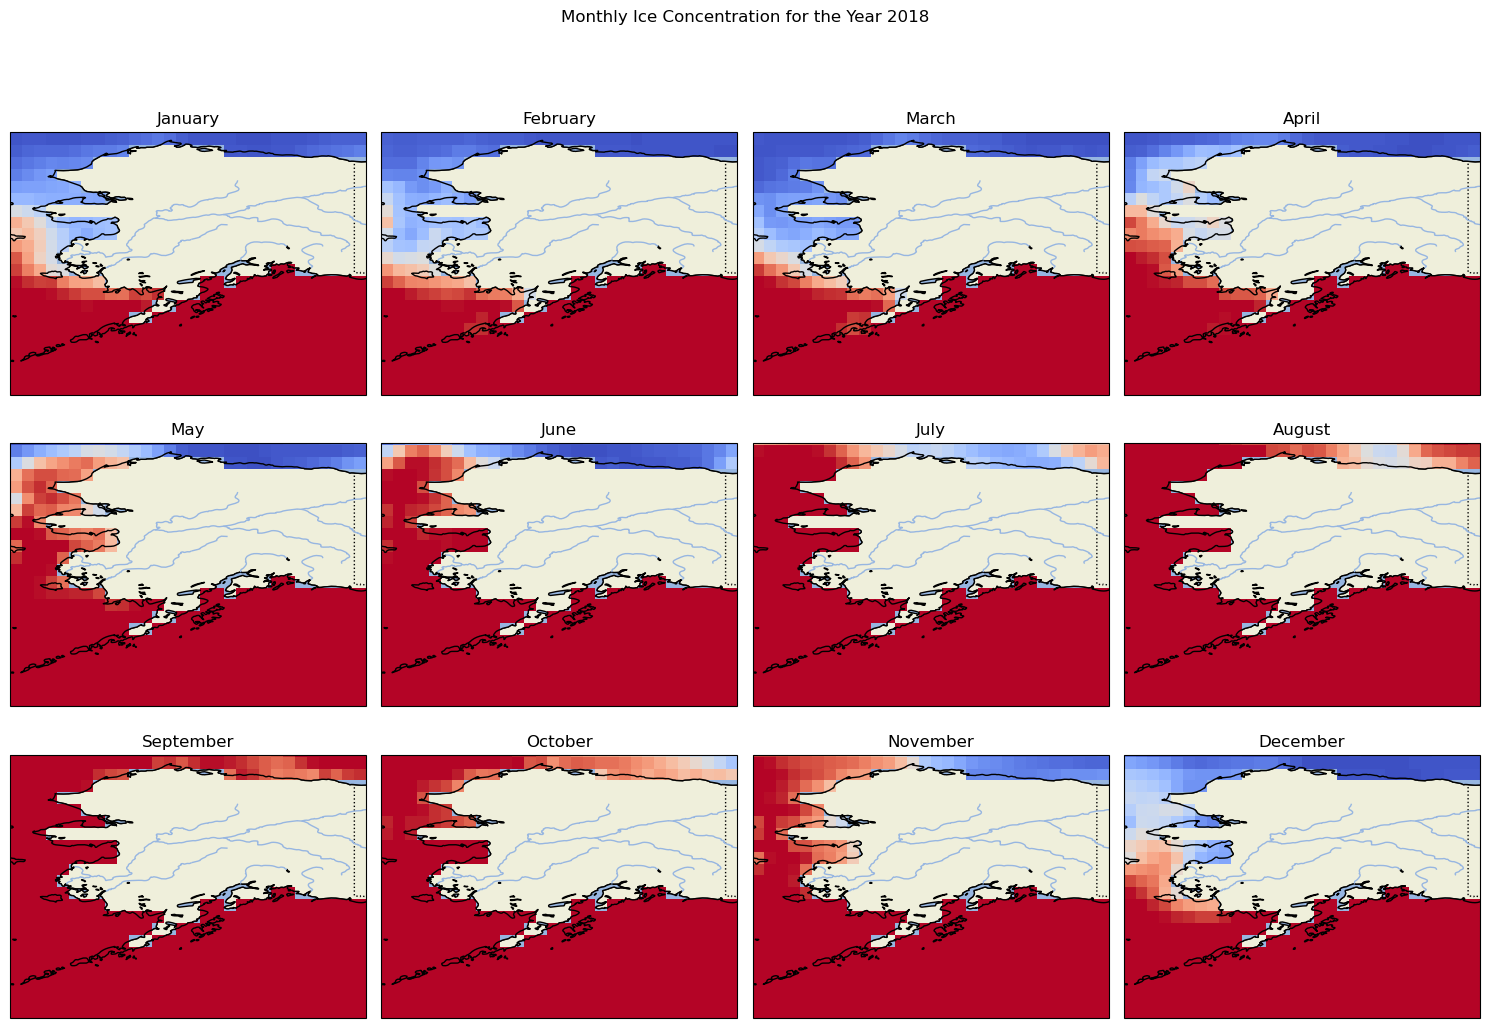

In [30]:
# Select data for the year 2018
icec_2018 = ds_icec['icec'].sel(time=slice('2018-01-01', '2018-12-31'))

# Define the extent for Alaska
extent = [-170, -140, 50, 72]

# Plot the ice concentration for each month of the year 2018
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    icec_2018.isel(time=i).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)
    ax.set_title(calendar.month_name[i+1])

# Add colorbar
# cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.02])
# cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='coolwarm_r'), cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Ice Concentration')
fig.suptitle('Monthly Ice Concentration for the Year 2018', y=1.05)
plt.tight_layout()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


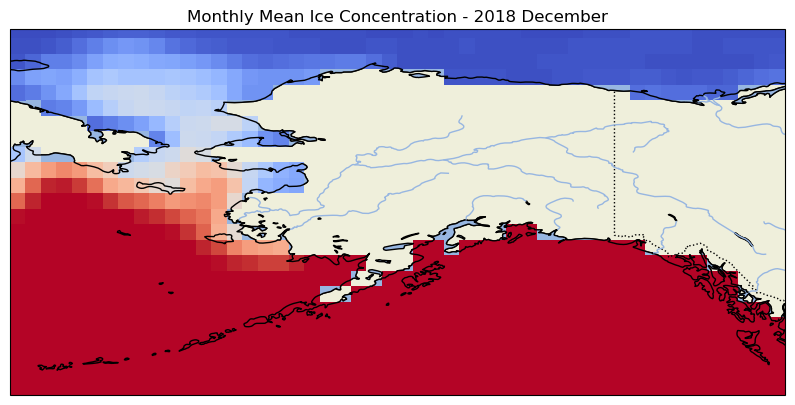

In [48]:
# create an animation of the ice concentration data
import matplotlib.animation as animation

# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_feature(cart.BORDERS, linestyle=':')
ax.add_feature(cart.COASTLINE)
ax.add_feature(cart.LAND, edgecolor='black')
ax.add_feature(cart.OCEAN)
ax.add_feature(cart.LAKES, edgecolor='black')
ax.add_feature(cart.RIVERS)

# Initialize the plot with the first frame
icec_1950_2018 = ds_icec['icec'].sel(time=slice('1950-01-01', '2018-12-31'))
ice_plot = icec_1950_2018.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    ice_plot = icec_1950_2018.isel(time=frame).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)
    time = pd.to_datetime(str(icec_1950_2018['time'].values[frame]))
    ax.set_title(f'Monthly Mean Ice Concentration - {time.year} {calendar.month_name[time.month]}')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(icec_1950_2018['time']), repeat=True)

# Save the animation as a GIF
ani.save(r'C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\Assignment3\animation.gif', writer='imagemagick')

plt.show()

In [41]:

# Create animations for each month for ice concentration data

import matplotlib.animation as animation

# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Create animations for each month
for month in range(1, 13):
    # Select data for the specific month
    icec_month = ds_icec['icec'].sel(time=ds_icec['time.month'] == month)

    # Create a figure and axis for the animation
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)

    # Initialize the plot with the first frame
    ice_plot = icec_month.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)

    # Function to update the plot for each frame
    def update(frame):
        ax.clear()
        ax.set_extent(extent)
        ax.add_feature(cart.BORDERS, linestyle=':')
        ax.add_feature(cart.COASTLINE)
        ax.add_feature(cart.LAND, edgecolor='black')
        ax.add_feature(cart.OCEAN)
        ax.add_feature(cart.LAKES, edgecolor='black')
        ax.add_feature(cart.RIVERS)
        ice_plot = icec_month.isel(time=frame).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)
        time = pd.to_datetime(str(icec_month['time'].values[frame]))
        ax.set_title(f'Ice Concentration - {time.year} {calendar.month_name[month]}')

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=len(icec_month['time']), repeat=True)

    # Save the animation as a GIF
    ani.save(f'C:\\Users\\rbendopa\\OneDrive - George Mason University - O365 Production\\Class\\Clim680\\Assignment3\\ice_concentration_animation_{calendar.month_name[month]}.gif', writer='imagemagick')

    plt.close(fig)

MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


C:\Users\rbendopa\AppData\Local\Temp\ipykernel_22048\3762017066.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


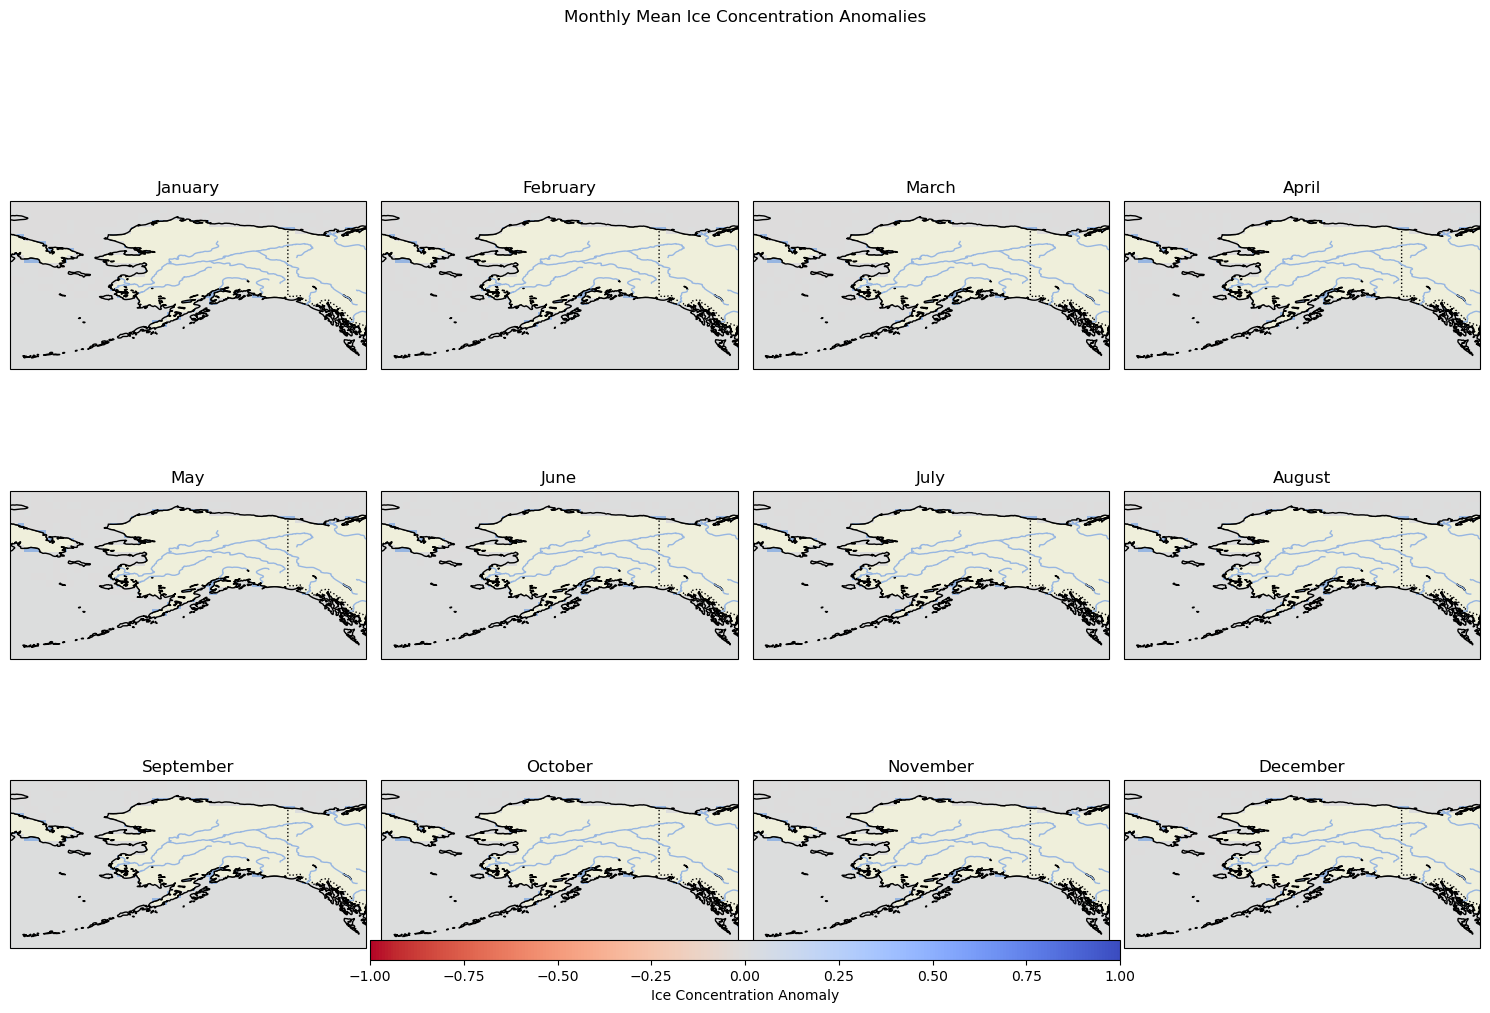

In [57]:
# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Plot the ice concentration anomalies for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    icec_anomaly['icec'].sel(time=icec_anomaly['time.month'] == i+1).mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', vmin=-1, vmax=1, add_colorbar=False)
    ax.set_title(calendar.month_name[i+1])

# Add colorbar
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.02])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1, vmax=1), cmap='coolwarm_r'), cax=cbar_ax, orientation='horizontal')
cbar.set_label('Ice Concentration Anomaly')
fig.suptitle('Monthly Mean Ice Concentration Anomalies', y=1.05)
plt.tight_layout()
plt.show()

## El Nino


In [24]:
file_path = r"C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\nino34_1982-2019.oisstv2_anoms.nc"
ds_nino34 = xr.open_dataset(file_path)
ds_nino34


<xarray.Dataset> Size: 9kB
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB ...
Data variables:
    sst      (time) float32 2kB ...

El Nino:  61
Neutral:  330
La Nina:  65
[array(61), array(65), array(330)]


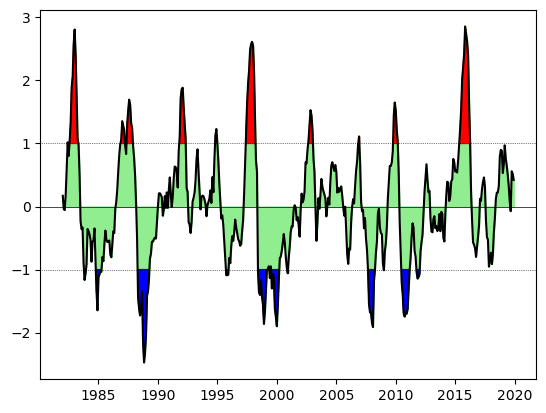

In [25]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'].values,ds_nino34['sst'],color='lightgreen')
plt.fill_between(ds_nino34['time'].values,elnino,y2=1.0,color='red')
plt.fill_between(ds_nino34['time'].values,lanina,y2=-1.0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;

In [28]:
da_icec = ds_icec.sel(time=slice(ds_nino34['time'][0], ds_nino34['time'][-1]))

icec_climo = da_icec.groupby('time.month').mean(dim='time')
icec_anoms  = da_icec.groupby('time.month') - icec_climo
icec_anoms   

<xarray.Dataset> Size: 118MB
Dimensions:  (lat: 180, lon: 360, time: 456)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec     (time, lat, lon) float32 118MB 0.009737 0.01026 0.00921 ... nan nan

In [29]:
elnino_icec = icec_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_icec = icec_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_icec = icec_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_icec = [elnino_icec, lanina_icec, neutral_icec]
comp_icec

[<xarray.Dataset> Size: 261kB
 Dimensions:  (lat: 180, lon: 360)
 Coordinates:
   * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
   * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
 Data variables:
     icec     (lat, lon) float32 259kB 0.01202 0.01174 0.01181 ... nan nan nan,
 <xarray.Dataset> Size: 261kB
 Dimensions:  (lat: 180, lon: 360)
 Coordinates:
   * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
   * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
 Data variables:
     icec     (lat, lon) float32 259kB 0.01293 0.01314 0.01333 ... nan nan nan,
 <xarray.Dataset> Size: 261kB
 Dimensions:  (lat: 180, lon: 360)
 Coordinates:
   * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
   * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
 Data variables:
     icec     (lat, lon) float32 259kB -0.004768 -0.004758 -0.004809 

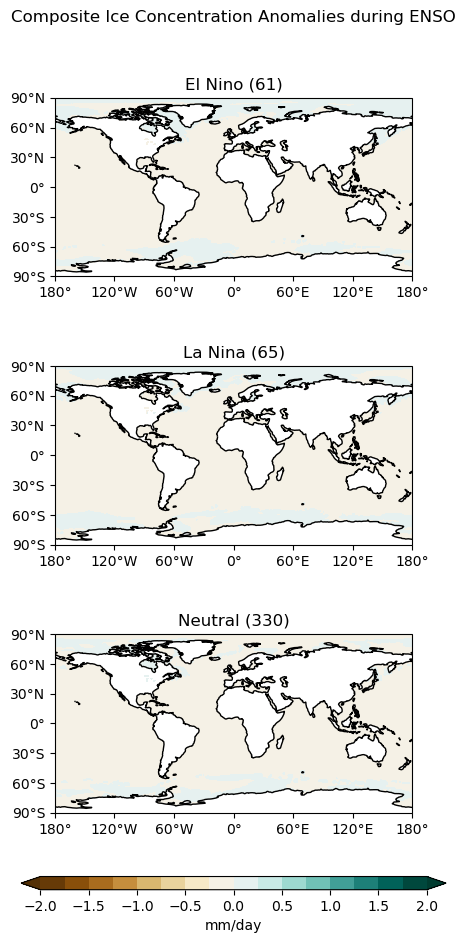

In [39]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i, enso in enumerate(comp_icec):

        # Select the season
        data = comp_icec[i]['icec']

        # Add the cyclic point
        data, lon = add_cyclic_point(data, coord=comp_icec[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lon, comp_icec[i]['lat'],data, clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Ice Concentration Anomalies during ENSO') ;


### Defining El Nino, La Nina, and Neutral

Nino3.4 >= 1 -> El Nino

Nino3.4 <= -1 -> La Nina

Nino3.4 > -1 and Nino3.4 < 1 -> Neutral

In [12]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

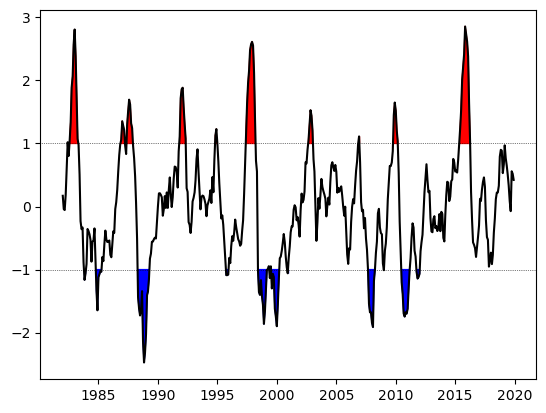

In [13]:
plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'],1,elnino,color='red')
plt.fill_between(ds_nino34['time'],lanina, -1,color='blue')
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted')

In [15]:
# Preprocess and aggregate data
ice_concentration = ds_icec['icec'].groupby('time.month').mean()
ice_concentration

<xarray.DataArray 'icec' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[0.99782366, 0.997706  , 0.99794126, ..., 0.99782366,
         0.99776477, 0.99788237],
        [0.9973529 , 0.9974117 , 0.99747056, ..., 0.9973528 ,
         0.9973529 , 0.9973529 ],
        [0.9970003 , 0.99717677, 0.99723566, ..., 0.9972355 ,
         0.9971179 , 0.99653   ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.9984707 , 0.99858826, 0.99841183, ..., 0.9985296 ,
         0.9984707 , 0.99858826],
        [0.99794126, 0.99794114, 0.9978235 , ..., 0.9980589 ,
         0.998     , 0.9980589 ],
        [0.9971178 , 0.997059  , 0.9970002 , ..., 0.99735314,
         0.99723536, 0.99658865],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.9961765 , 0.99611765, 0.9961765 , ..., 0.99641186,
         0.9962353 , 0.9962942 ],
        [0.99594134, 0.99582356, 0.9959413 , ..., 0.99594134,
         0.9960001 , 0.99594134],
        [0.9957061 , 0.99576485, 0.99576485, ..., 0.99582356,
         0.99600005, 0.9949417 ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Global Ice Concentration
    valid_range:   [0. 1.]
    units:         fr
    var_desc:      Ice Concentration
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    actual_range:  [0.   1.05]
    level_desc:    Surface

C:\Users\bendo\AppData\Local\Temp\ipykernel_34952\1901922542.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


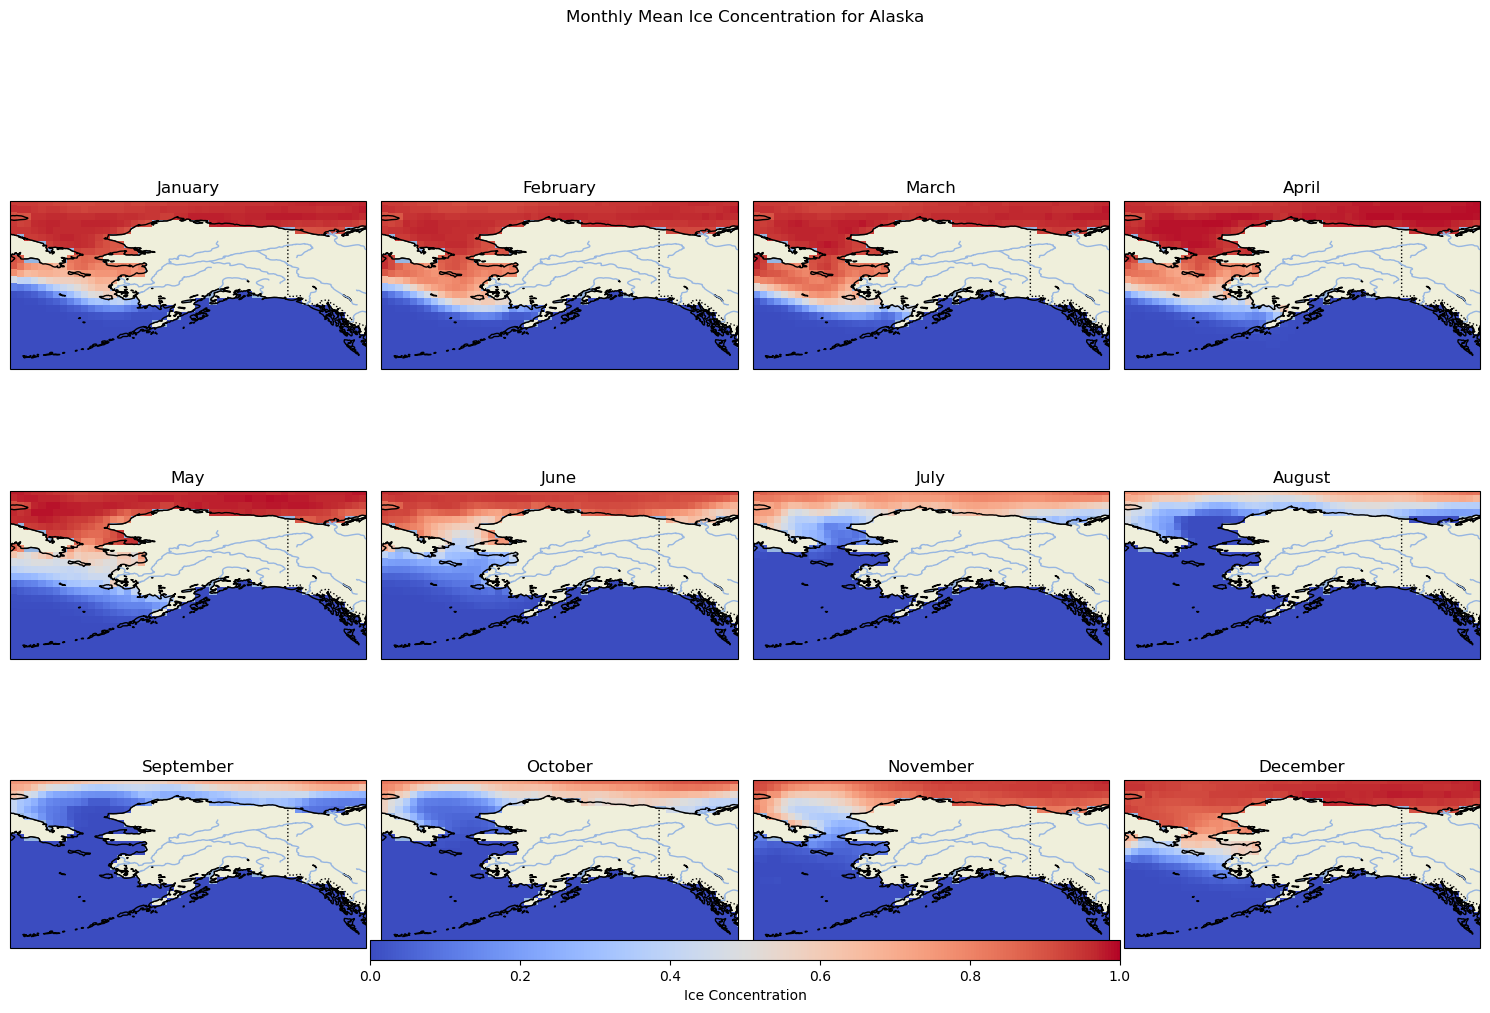

In [37]:
# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Plot the ice concentration for Alaska
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    #ax.gridlines(draw_labels=True)
    ice_concentration.isel(month=i).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
    ax.set_title(calendar.month_name[i+1])

# Add colorbar
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.02])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='coolwarm'), cax=cbar_ax, orientation='horizontal')
cbar.set_label('Ice Concentration')
fig.suptitle('Monthly Mean Ice Concentration for Alaska', y=1.05)
plt.tight_layout()
plt.show()

In [25]:
# Path to your .data file
file_path = r"C:\Users\bendo\OneDrive - George Mason University - O365 Production\Class\Clim680\data\oni.data"

# Reading the .data file into a DataFrame
oni = pd.read_csv(file_path, delim_whitespace=True)
print(oni.head())

                                                                  1950  2024
1950 -1.53 -1.34 -1.16 -1.18 -1.07 -0.85 -0.54 -0.42 -0.39 -0.44 -0.60 -0.80
1951 -0.82 -0.54 -0.17 0.18  0.36  0.58  0.70  0.89   0.99  1.15  1.04  0.81
1952 0.53  0.37  0.34  0.29  0.20  0.00  -0.08 0.00   0.15  0.10  0.04  0.15
1953 0.40  0.60  0.63  0.66  0.75  0.77  0.75  0.73   0.78  0.84  0.84  0.81
1954 0.76  0.47  -0.05 -0.41 -0.54 -0.50 -0.64 -0.84 -0.90 -0.77 -0.73 -0.66


C:\Users\bendo\AppData\Local\Temp\ipykernel_34952\2892752573.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  oni = pd.read_csv(file_path, delim_whitespace=True)


In [23]:
# Merge or compare ENSO data with ice concentration
plt.figure(figsize=(10, 6))
plt.plot(oni['value'], label='ONI Index')
plt.plot(ds_icec['time'], ice_concentration.mean(dim=['latitude', 'longitude']), label='Sea Ice Concentration')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Comparison of ENSO and Arctic Sea Ice Concentration')
plt.show()

KeyError: 'value'

<Figure size 1000x600 with 0 Axes>